# EDA y Carga

### Importación de librerías

Del paquete "connection_db", ubicado en el directorio "source del directorio", se importa el módulo "db_utils" que proporciona una funciones centralizada para establecer y gestionar conexiones a una base de datos PostgreSQL. Su objetivo es promover la reutilización de código, la modularidad y la consistencia en el acceso a la base de datos dentro de los diferentes notebooks de este proyecto.

In [25]:
import sys
import os
import pandas as pd
import numpy as np
from psycopg2 import sql
from sqlalchemy import create_engine
import seaborn as sns
import matplotlib.pyplot as plt
sys.path.append(os.path.abspath('../source'))
from connection_db.db_utils import get_connection 



Este fragmento de código establece una conexión a una base de datos PostgreSQL utilizando la función "get_connection" del módulo "connection_db.db_utils", lee todos los datos de la tabla "accidents" en un DataFrame de Pandas, muestra las primeras filas del DataFrame y luego cierra la conexión a la base de datos utilizando la función "close_connection" del mismo módulo, para liberar recursos.

In [26]:
engine = get_connection()
df = pd.read_sql_query("SELECT * FROM accidents", engine)
df.head()


Engine creado exitosamente


,country,year,month,day_of_week,time_of_day,urban_rural,road_type,weather_conditions,visibility_level,number_of_vehicles_involved,...,number_of_fatalities,emergency_response_time,traffic_volume,road_condition,accident_cause,insurance_claims,medical_cost,economic_loss,region,population_density
0,USA,2002,October,Tuesday,Evening,Rural,Street,Windy,220.414651,1,...,2,58.625720,7412.752760,Wet,Weather,4,40499.856982,22072.878502,Europe,3866.273014
1,UK,2014,December,Saturday,Evening,Urban,Street,Windy,168.311358,3,...,1,58.041380,4458.628820,Snow-covered,Mechanical Failure,3,6486.600073,9534.399441,North America,2333.916224
2,USA,2012,July,Sunday,Afternoon,Urban,Highway,Snowy,341.286506,4,...,4,42.374452,9856.915064,Wet,Speeding,4,29164.412982,58009.145124,South America,4408.889129
3,UK,2017,May,Saturday,Evening,Urban,Main Road,Clear,489.384536,2,...,3,48.554014,4958.646267,Icy,Distracted Driving,3,25797.212566,20907.151302,Australia,2810.822423
4,Canada,2002,July,Tuesday,Afternoon,Rural,Highway,Rainy,348.344850,1,...,4,18.318250,3843.191463,Icy,Distracted Driving,8,15605.293921,13584.060759,South America,3883.645634


## Tipos de datos

In [27]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132000 entries, 0 to 131999
Data columns (total 30 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   country                      132000 non-null  object 
 1   year                         132000 non-null  int64  
 2   month                        132000 non-null  object 
 3   day_of_week                  132000 non-null  object 
 4   time_of_day                  132000 non-null  object 
 5   urban_rural                  132000 non-null  object 
 6   road_type                    132000 non-null  object 
 7   weather_conditions           132000 non-null  object 
 8   visibility_level             132000 non-null  float64
 9   number_of_vehicles_involved  132000 non-null  int64  
 10  speed_limit                  132000 non-null  int64  
 11  driver_age_group             132000 non-null  object 
 12  driver_gender                132000 non-null  object 
 13 

El conjunto de datos analizado se encuentra estructurado en una base de datos con un total de 132,000 registros y 31 columnas. Cada columna representa una variable específica relacionada con el análisis de accidentes de tránsito, abarcando diferentes tipos de datos que incluyen valores numéricos enteros (int64), flotantes (float64), booleanos (bool) y caracteres (object).

In [28]:

num_floats = sum(df.dtypes == 'float64')
num_ints = sum(df.dtypes == 'int64')
num_objects = sum(df.dtypes == 'object')
num_bools = sum(df.dtypes == 'bool')

print(f"Columnas de tipo float: {num_floats}")
print(f"Columnas de tipo integer: {num_ints}")
print(f"Columnas de tipo object: {num_objects}")
print(f"Columnas de tipo boolean: {num_bools}")


Columnas de tipo float: 7
Columnas de tipo integer: 9
Columnas de tipo object: 14
Columnas de tipo boolean: 0


El dataset bajo análisis contiene distintos tipos de datos distribuidos de la siguiente manera:

7 columnas de tipo float64: Estas columnas representan variables numéricas de precisión decimal, como niveles de alcohol en sangre, densidad poblacional y condiciones de visibilidad.
9 columnas de tipo int64: Se trata de datos numéricos discretos, como identificadores, límites de velocidad y cantidad de vehículos involucrados en un accidente.
14 columnas de tipo object: Contienen valores categóricos y de texto, como nombres de países, días de la semana y tipos de carretera.
1 columna de tipo boolean: Representa variables binarias que indican estados verdaderos o falsos, como si el conductor estaba fatigado o no.

In [29]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,132000.0,2011.973348,7.198624,2000.000000,2006.000000,2012.000000,2018.000000,2024.000000
visibility_level,132000.0,275.038776,129.923625,50.001928,162.338860,274.672990,388.014111,499.999646
number_of_vehicles_involved,132000.0,2.501227,1.117272,1.000000,2.000000,3.000000,3.000000,4.000000
speed_limit,132000.0,74.544068,26.001448,30.000000,52.000000,74.000000,97.000000,119.000000
driver_alcohol_level,132000.0,0.125232,0.072225,0.000002,0.062630,0.125468,0.187876,0.249999
driver_fatigue,132000.0,0.500576,0.500002,0.000000,0.000000,1.000000,1.000000,1.000000
pedestrians_involved,132000.0,1.000773,0.816304,0.000000,0.000000,1.000000,2.000000,2.000000
cyclists_involved,132000.0,0.998356,0.817764,0.000000,0.000000,1.000000,2.000000,2.000000
number_of_injuries,132000.0,9.508205,5.774366,0.000000,5.000000,9.000000,15.000000,19.000000
number_of_fatalities,132000.0,1.995439,1.412974,0.000000,1.000000,2.000000,3.000000,4.000000


El presente análisis tiene como objetivo evaluar las principales características estadísticas de un conjunto de datos. A partir de un resumen estadístico, se busca comprender la distribución de las variables numéricas clave, identificar patrones y evaluar la dispersión de los datos.

Este análisis es fundamental para:

Comprender la naturaleza de los datos, incluyendo tendencias generales y variabilidad.
Identificar valores extremos o atípicos que puedan requerir limpieza o normalización.
Evaluar la coherencia y calidad de la información antes de aplicar modelos de predicción o realizar inferencias.

Año del incidente: El promedio de los incidentes ocurre en el año 2011, con datos que abarcan desde 2000 hasta 2024, lo que sugiere que el dataset contiene información de múltiples décadas.

Visibilidad: La visibilidad promedio en los incidentes es de 275 metros, con una variabilidad alta (desviacion estandar = 129.92), lo que indica escenarios con condiciones climáticas diversas.
Límite de velocidad: En promedio, los límites de velocidad en los incidentes registrados son de 74 km/h, con un rango que va desde 30 km/h hasta 119 km/h.
Volumen de tráfico: Se observa una media de 5,041 vehículos en el área del accidente, con casos extremos desde 100 hasta 10,000 vehículos, lo que sugiere una cobertura de distintos tipos de vías (desde carreteras secundarias hasta autopistas congestionadas).

Número de vehículos involucrados: La mayoría de los incidentes involucran 2 a 3 vehículos, lo que sugiere que predominan colisiones entre automóviles en lugar de accidentes múltiples.
Nivel de alcohol en conductores: La media es 0.125 g/dL, lo que sugiere que algunos conductores están bajo la influencia del alcohol, aunque se observan casos con valores cercanos a 0.25 g/dL, que podrían indicar conducción en estado de ebriedad.
Peatones y ciclistas involucrados: El número medio de peatones y ciclistas afectados por incidente es cercano a 1, con un máximo de 2 personas, lo que indica que la presencia de estos actores vulnerables es frecuente en los accidentes analizados.

Número de heridos: El promedio de personas lesionadas por accidente es 9.5, con casos extremos de hasta 19 heridos, lo que sugiere una alta severidad en los incidentes analizados.
Número de fallecidos: La media de 2 muertes por accidente indica la gravedad de ciertos eventos, con valores que alcanzan 4 fallecidos en los peores escenarios.
Tiempo de respuesta de emergencia: Los servicios de emergencia tardan un promedio de 32 minutos en llegar, con una variabilidad significativa (desviacion estandar = 15.88), lo que podría influir en la tasa de mortalidad.
Reclamos de seguro: Se reporta un promedio de 4.49 reclamos por accidente, con máximos de hasta 9, lo que implica eventos con múltiples víctimas y daños materiales.

Costos médicos: Cada accidente genera en promedio $25,198 USD en gastos médicos, lo que resalta la carga económica en el sistema de salud.
Pérdidas económicas: El impacto financiero por accidente asciende en promedio a $50,437 USD, con eventos extremos que llegan a los $100,000 USD, lo que demuestra la magnitud del daño económico causado por los incidentes viales.


## Limpieza

### Manejo de Datos Faltantes

El código verifica la presencia de datos faltantes (valores nulos) en un DataFrame de Pandas. Primero, calcula el número total de valores nulos en el DataFrame. Si este número es cero, se imprime el mensaje "Datos nulos no encontrados.", lo que indica que todas las celdas del DataFrame contienen datos válidos. En caso contrario, el código identifica y muestra las columnas que contienen al menos un valor nulo, junto con el número total de valores nulos encontrados.

In [30]:
datos_faltantes = df.isnull().sum().sum()

if datos_faltantes == 0:
    print("\n Datos nulos no encontrados. ")
else:
    columnas_con_nulos = df.columns[df.isnull().any()].tolist()
    print(f"Columnas con datos nulos: {columnas_con_nulos}")
    print(f"Numero total de datos nulos: {datos_faltantes}")


 Datos nulos no encontrados. 


En este caso el print indica que la sumatoria de los valores nulos del dataframe es 0, es decir, que no hay.

### Manejo de Datos Duplicados

In [31]:
duplicados=df.duplicated()
total_duplicados= duplicados.sum()

print(f"\n Total de filas duplicadas: {total_duplicados}")

if total_duplicados > 0:
    print("\n Filas duplicadas encontradas: ")
    print(df[df.duplicated()])


 Total de filas duplicadas: 0


El resultado indica que no hay filas duplicadas en el conjunto de datos, lo que significa que cada fila es única y no hay registros repetidos. Esto asegura la integridad de los datos y evita posibles sesgos en el análisis.

### Manejo de datos atípicos

Rango Intercuartil (IQR) para detectar valores atípicos

In [32]:
numerical_cols = ['speed_limit', 'driver_alcohol_level', 'number_of_vehicles_involved',
                  'number_of_injuries', 'number_of_fatalities', 'emergency_response_time',
                  'traffic_volume', 'medical_cost', 'economic_loss', 'population_density']

for col in numerical_cols:
    print(f"\n--- Handling Outliers for {col} ---")

    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_limit) | (df[col] > upper_limit)]
    print(f"Number of Outliers: {len(outliers)}")

    df[col] = np.where(df[col] > upper_limit, upper_limit, df[col])
    df[col] = np.where(df[col] < lower_limit, lower_limit, df[col])

    print(f"Outliers handled using capping/flooring.")

    
    Q1_new = df[col].quantile(0.25)
    Q3_new = df[col].quantile(0.75)
    IQR_new = Q3_new - Q1_new
    lower_limit_new = Q1_new - 1.5 * IQR_new
    upper_limit_new = Q3_new + 1.5 * IQR_new

    outliers_after = df[(df[col] < lower_limit_new) | (df[col] > upper_limit_new)]
    print(f"Number of Outliers after handling: {len(outliers_after)}")


--- Handling Outliers for speed_limit ---
Number of Outliers: 0
Outliers handled using capping/flooring.
Number of Outliers after handling: 0

--- Handling Outliers for driver_alcohol_level ---
Number of Outliers: 0
Outliers handled using capping/flooring.
Number of Outliers after handling: 0

--- Handling Outliers for number_of_vehicles_involved ---
Number of Outliers: 0
Outliers handled using capping/flooring.
Number of Outliers after handling: 0

--- Handling Outliers for number_of_injuries ---
Number of Outliers: 0
Outliers handled using capping/flooring.
Number of Outliers after handling: 0

--- Handling Outliers for number_of_fatalities ---
Number of Outliers: 0
Outliers handled using capping/flooring.
Number of Outliers after handling: 0

--- Handling Outliers for emergency_response_time ---
Number of Outliers: 0
Outliers handled using capping/flooring.
Number of Outliers after handling: 0

--- Handling Outliers for traffic_volume ---
Number of Outliers: 0
Outliers handled usin

El procedimiento aplicado utiliza el Rango Intercuartil (IQR) para detectar valores atípicos en las variables numéricas del conjunto de datos. Se establecieron límites superior e inferior y se reemplazaron los valores que excedieran estos límites mediante el método de capping/flooring. Sin embargo, los resultados indican que no se detectaron valores atípicos en ninguna de las variables analizadas. Esto sugiere que la distribución de los datos es homogénea y no presenta desviaciones extremas que puedan afectar el análisis.

### Conformidad 

#### Número de cifras decimales

El código examina las columnas con tipo de datos 'float' en DataFrame `df` determinando el número máximo de decimales presentes en cada columna para comprender la precisión de los datos. Luego, redondea todos los valores de estas columnas a dos decimales, simplificando los datos y mejorando su legibilidad para análisis y presentación.

In [33]:
columnas_float = df.select_dtypes(include=['float'])


for col in columnas_float.columns:
    max_decimales = columnas_float[col].astype(str).str.split('.').str[1].str.len().max()
    print(f"Número máximo de decimales en la columna '{col}': {max_decimales}")


Número máximo de decimales en la columna 'visibility_level': 15
Número máximo de decimales en la columna 'number_of_vehicles_involved': 1
Número máximo de decimales en la columna 'speed_limit': 1
Número máximo de decimales en la columna 'driver_alcohol_level': 20
Número máximo de decimales en la columna 'number_of_injuries': 1
Número máximo de decimales en la columna 'number_of_fatalities': 1
Número máximo de decimales en la columna 'emergency_response_time': 16
Número máximo de decimales en la columna 'traffic_volume': 14
Número máximo de decimales en la columna 'medical_cost': 14
Número máximo de decimales en la columna 'economic_loss': 13
Número máximo de decimales en la columna 'population_density': 15


In [34]:
columnas_float_redondeadas = columnas_float.round(2)

print(columnas_float_redondeadas.head())

   visibility_level  number_of_vehicles_involved  speed_limit  \
0            220.41                          1.0         37.0   
1            168.31                          3.0         96.0   
2            341.29                          4.0         62.0   
3            489.38                          2.0         78.0   
4            348.34                          1.0         98.0   

   driver_alcohol_level  number_of_injuries  number_of_fatalities  \
0                  0.05                 8.0                   2.0   
1                  0.23                 6.0                   1.0   
2                  0.14                13.0                   4.0   
3                  0.12                 6.0                   3.0   
4                  0.16                13.0                   4.0   

   emergency_response_time  traffic_volume  medical_cost  economic_loss  \
0                    58.63         7412.75      40499.86       22072.88   
1                    58.04         4458.63  

#### Valores de la columna 'driver_alcohol_level'

Los niveles de alcohol en la sangre pueden ser agrupados en categorías significativas (Bajo, Moderado, Alto, etc.) que representan diferentes niveles de riesgo o impacto, en lugar de tratarse como simples valores continuos difíceles de interpretar para el público general. Para esto se utiliza el "Binning", que  implica convertir una variable numérica continua en una variable categórica ordinal al agrupar los valores en intervalos o "bins".

Este código define una función llamada `categorizar_alcohol_level` que clasifica los niveles de alcohol en la sangre (driver_alcohol_level) en categorías como "Bajo", "Moderado", "Alto", "Peligroso" y "Letal", basándose en umbrales específicos. Luego, aplica esta función a la columna "driver_alcohol_level" del DataFrame df para crear una nueva columna llamada "Alcohol_Level_Category", que contiene las categorías correspondientes para cada valor de nivel de alcohol. Finalmente, imprime la columna "Alcohol_Level_Category" para mostrar las clasificaciones resultantes. 

In [35]:
def categorizar_alcohol_level(driver_alcohol_level):
    if driver_alcohol_level < 0.03:
        return "Bajo"
    elif driver_alcohol_level < 0.08:
        return "Moderado"
    elif driver_alcohol_level < 0.20:
        return "Alto"
    elif driver_alcohol_level < 0.30:
        return "Peligroso"
    else:
        return "Letal"

df["Alcohol_Level_Category"] = df["driver_alcohol_level"].apply(categorizar_alcohol_level)

print(df["Alcohol_Level_Category"])


0          Moderado
1         Peligroso
2              Alto
3              Alto
4              Alto
            ...    
131995     Moderado
131996     Moderado
131997     Moderado
131998         Bajo
131999         Alto
Name: Alcohol_Level_Category, Length: 132000, dtype: object


En este fragmento de código, se implementa una estrategia de transformación de datos mediante la creación de la función categorize_alcohol_level(driver_alcohol_level), la cual clasifica los valores de la columna driver_alcohol_level en distintas categorías de riesgo: Bajo, Moderado, Alto, Peligroso y Letal. Estas categorías reflejan los efectos del alcohol en la conducción y su impacto potencial en la seguridad vial. Esta conversión no solo optimiza la representación de los datos en visualizaciones, sino que también permite la identificación de patrones clave entre los niveles de alcohol y otros factores críticos, como la severidad de los accidentes o el número de víctimas. 


#### Valores de la columna 'visibility_level'

El código reemplaza la columna "visibility_level" por "Visibility_Category", la cual almacena la clasificación correspondiente para cada registro, pasando de un valor numérico a una categoría descriptiva: Muy Baja, Baja, Moderada o Alta. Esto permite transformar una variable numérica en categórica, facilitando la interpretación de los datos y su representación en visualizaciones.


In [36]:
def categorize_visibility(visibility_level):
    if visibility_level < 200:
        return "Muy Baja"
    elif visibility_level < 300:
        return "Baja"
    elif visibility_level < 400:
        return "Moderada"
    else:
        return "Alta"

df["Visibility_Category"] = df["visibility_level"].apply(categorize_visibility)

print(df["Visibility_Category"])

0             Baja
1         Muy Baja
2         Moderada
3             Alta
4         Moderada
            ...   
131995    Moderada
131996    Muy Baja
131997    Muy Baja
131998        Baja
131999        Baja
Name: Visibility_Category, Length: 132000, dtype: object


#### Valores de "days_order", "months_order" y "time_of_day"

In [37]:
print("\nValores únicos en la columna 'time_of_day':")
print(df["time_of_day"].unique())


Valores únicos en la columna 'time_of_day':
['Evening' 'Afternoon' 'Night' 'Morning']


Las columnas "day_of_week", "month" y "time, of day" son variables categóricas ordinales, lo que significa que las categorías tienen un orden lógico (los días de la semana y los meses del año tienen un orden específico).Al estructurar las variables con un orden definido, se facilita la representación gráfica en gráficos de tendencia o análisis estacionales, evitando errores en la disposición de los datos. Asimismo, esta verificación contribuye a la correcta interpretación de patrones temporales en la ocurrencia de accidentes, lo que puede ser clave para la toma de decisiones en seguridad vial y planificación de estrategias preventivas.

Este código transforma las columnas categóricas "day_of_week", "month" y "time_of_day" en un tipo de dato categórico ordenado en Pandas. Esto permite que el DataFrame conozca el orden lógico de los días de la semana, los meses del año, y el tiempo del día. Se utiliza `pd.Categorical directamente, que es más eficiente y conciso que pd.CategoricalDtype y .astype(). Además, se ha simplificado la impresión de los resultados, eliminando la necesidad de verificar si las columnas están ordenadas, ya que pd.Categorical con ordered=True garantiza que lo estén. Esto facilita el análisis de datos temporales donde el orden es crucial.


In [38]:
days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
months_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
time_of_day_order = ["Morning", "Afternoon", "Evening", "Night"]


df["day_of_week"] = pd.Categorical(df["day_of_week"], categories=days_order, ordered=True)
df["month"] = pd.Categorical(df["month"], categories=months_order, ordered=True)
df["time_of_day"] = pd.Categorical(df["time_of_day"], categories=time_of_day_order, ordered=True)

print("Día de semana (Categórico):\n", df["day_of_week"].head(5))
print("\nMes (Categórico):\n", df["month"].head(5))
print("\nTiempo del día (Categórico):\n", df["time_of_day"].head(5))


Día de semana (Categórico):
 0     Tuesday
1    Saturday
2      Sunday
3    Saturday
4     Tuesday
Name: day_of_week, dtype: category
Categories (7, object): ['Monday' < 'Tuesday' < 'Wednesday' < 'Thursday' < 'Friday' < 'Saturday' < 'Sunday']

Mes (Categórico):
 0     October
1    December
2        July
3         May
4        July
Name: month, dtype: category
Categories (12, object): ['January' < 'February' < 'March' < 'April' ... 'September' < 'October' < 'November' < 'December']

Tiempo del día (Categórico):
 0      Evening
1      Evening
2    Afternoon
3      Evening
4    Afternoon
Name: time_of_day, dtype: category
Categories (4, object): ['Morning' < 'Afternoon' < 'Evening' < 'Night']


#### Valores únicos de otras columnas con dtype String

Con el el método `.unique()` de pandas se identifican y extraen los valores únicos presentes en las columnas driver_fatigue,vehicle_condition, accident_severity, road_type, weather_conditions y driver_gender.

In [39]:
print("\nValores únicos en la columna 'driver_fatigue':")
print(df["driver_fatigue"].unique())

print("\nValores únicos en la columna 'vehicle_condition':")
print(df["vehicle_condition"].unique())

print("\nValores únicos en la columna 'accident_severity':")
print(df["accident_severity"].unique())

print("\nValores únicos en la columna 'road_type':")
print(df["road_type"].unique())

print("\nValores únicos en la columna 'weather_conditions':")
print(df["weather_conditions"].unique())

print("\nValores únicos en la columna 'driver_gender':")
print(df["driver_gender"].unique())


Valores únicos en la columna 'driver_fatigue':
[0 1]

Valores únicos en la columna 'vehicle_condition':
['Poor' 'Moderate' 'Good']

Valores únicos en la columna 'accident_severity':
['Moderate' 'Minor' 'Severe']

Valores únicos en la columna 'road_type':
['Street' 'Highway' 'Main Road']

Valores únicos en la columna 'weather_conditions':
['Windy' 'Snowy' 'Clear' 'Rainy' 'Foggy']

Valores únicos en la columna 'driver_gender':
['Male' 'Female']


Si hubiera variaciones en la forma en que se representan los datos (por ejemplo, "Male", "male", "M"), sería necesario estandarizar los valores. En este caso no hay variaciones en la forma en que se representan los datos.

#### Formato de los enteros

La función `verificar_enteros(df)` toma un DataFrame de Pandas como entrada y verifica si todas las columnas de tipo entero contienen únicamente valores enteros válidos. Primero, identifica las columnas de tipo entero y luego itera sobre ellas, comprobando si cada columna es realmente de tipo entero y si todos sus valores son instancias de la clase int o np.integer. Si alguna columna no cumple con estas condiciones, la función imprime un mensaje de error y devuelve "False"; de lo contrario, devuelve True, indicando que todas las columnas enteras contienen solo valores enteros válidos

In [40]:
def verificar_enteros(df):

    columnas_int = df.select_dtypes(include=['int']).columns

    for col in columnas_int:
        if not pd.api.types.is_integer_dtype(df[col]):
            print(f"La columna '{col}' no contiene solo valores enteros.")
            return False

        if not all(isinstance(x, (int, np.integer)) for x in df[col]):
            print(f"La columna '{col}' contiene valores que no son enteros válidos.")
            return False

    return True


verificar_enteros(df)

True

Para las columnas numéricas no hay valores introducidos erróneamente en otro formato.

## Visualizaciones

#### Grafico de barras por Accidentes por dia de la semana 

C:\Users\Michel Burgos\AppData\Local\Temp\ipykernel_14732\2111650744.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


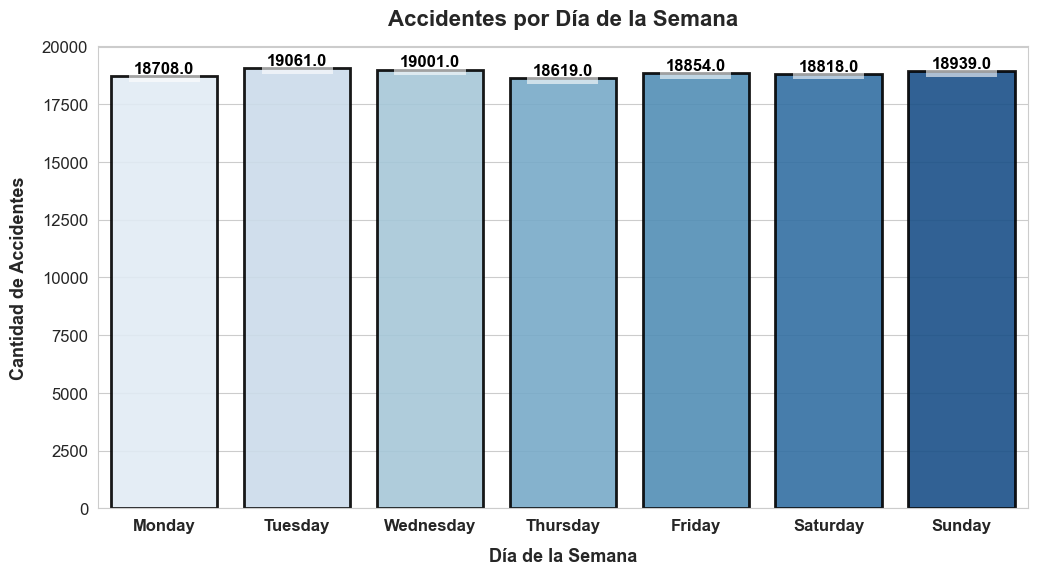

In [41]:
sns.set_style("whitegrid")

dias_ordenados = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

plt.figure(figsize=(12, 6))
ax = sns.countplot(
    data=df, 
    x='day_of_week', 
    order=dias_ordenados,  
    palette='Blues', 
    edgecolor='black', 
    linewidth=2, 
    alpha=0.9
)

plt.xticks(rotation=0, fontsize=12, fontweight='bold')
plt.yticks(fontsize=12)
plt.title('Accidentes por Día de la Semana', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Día de la Semana', fontsize=13, fontweight='bold', labelpad=10)
plt.ylabel('Cantidad de Accidentes', fontsize=13, fontweight='bold', labelpad=10)

for p in ax.patches:
    ax.annotate(
        f'{p.get_height()}', 
        (p.get_x() + p.get_width() / 2., p.get_height() + 1), 
        ha='center', va='bottom', 
        fontsize=12, fontweight='bold', color='black',
        bbox=dict(facecolor='white', edgecolor='none', alpha=0.6)  
    )

plt.show()

El gráfico de barras representa la cantidad de accidentes ocurridos en cada día de la semana. Se observa que la distribución de accidentes es relativamente uniforme a lo largo de la semana, con ligeras variaciones entre los días. Los valores oscilan entre aproximadamente 18,000 y 19,000 incidentes diarios, sin una diferencia drástica entre los días laborables y los fines de semana.

#### Grafico de barras de Accidentes por condición climática 

C:\Users\Michel Burgos\AppData\Local\Temp\ipykernel_14732\98549567.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


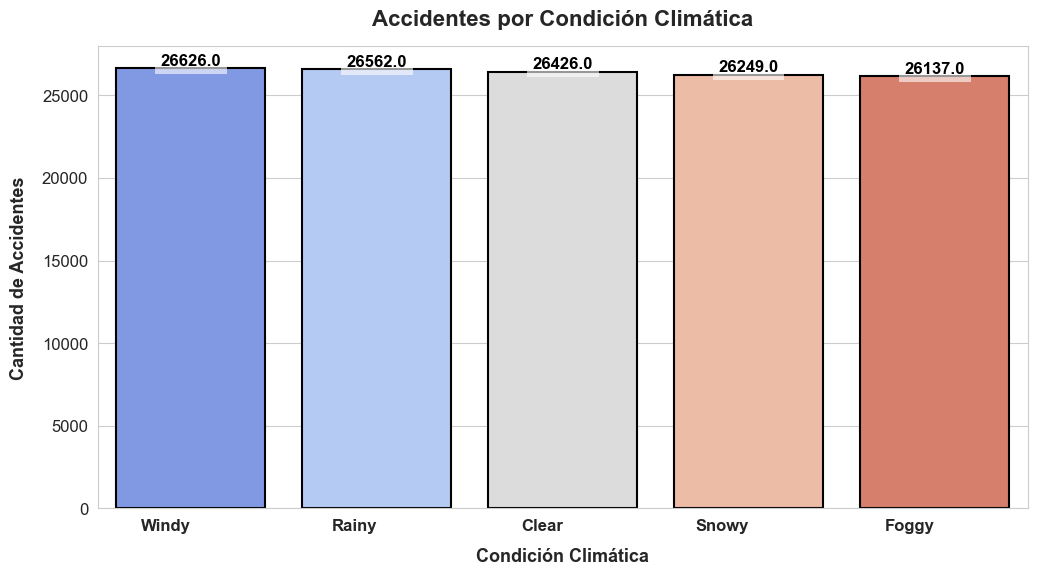

In [42]:
sns.set_style("whitegrid")

plt.figure(figsize=(12, 6))

ax = sns.countplot(
    data=df, 
    x='weather_conditions', 
    order=df['weather_conditions'].value_counts().index, 
    palette='coolwarm', 
    edgecolor='black', 
    linewidth=1.5
)

plt.xticks(rotation=0, ha='right', fontsize=12, fontweight='bold')
plt.yticks(fontsize=12)
plt.title('Accidentes por Condición Climática', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Condición Climática', fontsize=13, fontweight='bold', labelpad=10)
plt.ylabel('Cantidad de Accidentes', fontsize=13, fontweight='bold', labelpad=10)

for p in ax.patches:
    ax.annotate(
        f'{p.get_height()}', 
        (p.get_x() + p.get_width() / 2., p.get_height() + 1), 
        ha='center', va='bottom', 
        fontsize=12, fontweight='bold', color='black',
        bbox=dict(facecolor='white', edgecolor='none', alpha=0.6)  
    )

plt.show()

El gráfico de barras muestra la distribución de accidentes de tráfico según las condiciones climáticas. Se observa que los valores son relativamente homogéneos, con cifras que oscilan entre 26,137 y 26,626 accidentes, con el pico mas alto "Windy". A primera vista, esto indica que la climatología no presenta un impacto significativo en la cantidad de accidentes reportados.

#### Grafico de tendencias a lo largo de los años

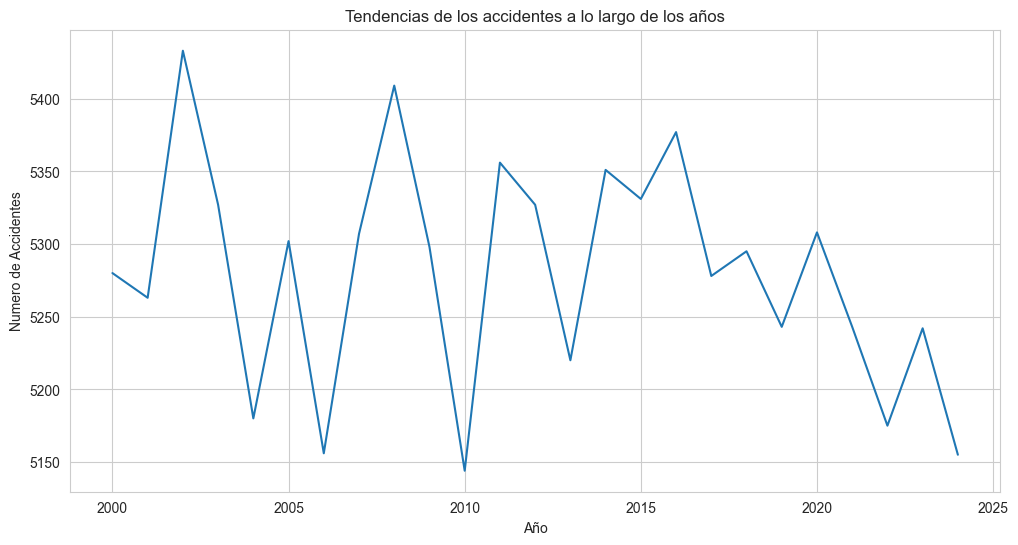

In [43]:
plt.figure(figsize=(12, 6))
sns.lineplot(x="year", y="accident_count", data=df.groupby("year").size().reset_index(name="accident_count"))
plt.title("Tendencias de los accidentes a lo largo de los años")
plt.xlabel("Año")
plt.ylabel("Numero de Accidentes")
plt.show()

El gráfico de tendencias muestra la evolución del número de accidentes de tráfico desde el año 2000 hasta aproximadamente 2024. A lo largo de este período, se observan fluctuaciones significativas, con picos pronunciados y caídas abruptas, lo que indica que los accidentes no siguen un patrón completamente estable.

El pico mas alto ocurre alrededor de 2002-2003, con un notable incremento que supera los 5,400 accidentes. Los descensos más pronunciados se registran alrededor de 2006, 2010 y 2022, donde el número de accidentes cae por debajo de 5,150. A pesar de las fluctuaciones, en la última parte del gráfico se observa una tendencia descendente, lo que indica que los accidentes han disminuido en comparación con los niveles más altos registrados en años anteriores.

#### Clasificacion de los dias de la semana 

In [44]:
weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]
weekends = ["Saturday", "Sunday"]

df["day_type"] = df["day_of_week"].apply(lambda x: "Weekday" if x in weekdays else "Weekend")

El siguiente fragmento de código tiene como objetivo clasificar los días de la semana en dos categorías: días laborables (Weekdays) y fines de semana (Weekends). Esta clasificación es útil en diversos análisis de datos.

#### Grafico de torta de los accidentes: dia de semana vs fin de semana 

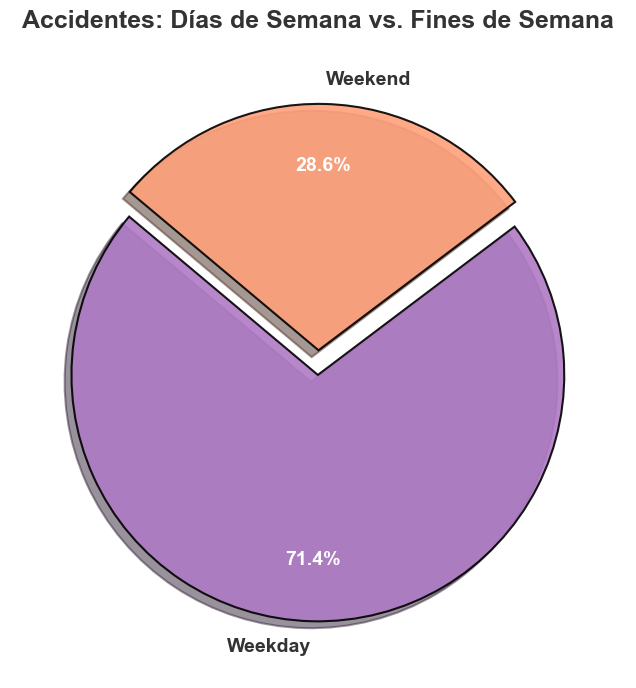

In [45]:
sns.set_style("white")

accidents_count = df["day_type"].value_counts()

colors = ["#af7ac5", "#FFA07A"]  
explode = (0.02, 0.08)  

fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(
    accidents_count, 
    labels=accidents_count.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=colors, 
    explode=explode, 
    shadow=True, 
    pctdistance=0.75,  
    wedgeprops={'edgecolor': 'black', 'linewidth': 1.5, 'alpha': 0.9}  
)

for text in texts:
    text.set_fontsize(14)
    text.set_fontweight("bold")
    text.set_color("#333")      

for autotexts in autotexts:
    autotexts.set_fontsize(14)
    autotexts.set_fontweight("bold")
    autotexts.set_color("white")
 
plt.title("Accidentes: Días de Semana vs. Fines de Semana", fontsize=18, fontweight="bold", pad=25, color="#333")

plt.show()


El gráfico de pastel presentado muestra la distribución de accidentes en función del tipo de día, diferenciando entre días laborables (Weekday) y fines de semana (Weekend). 

Un 71.4% de los accidentes ocurren de lunes a viernes. Solo un 28.6% de los accidentes se producen los sábados y domingos.

#### 

#### Graficos de Boxplot para datos atipicos 

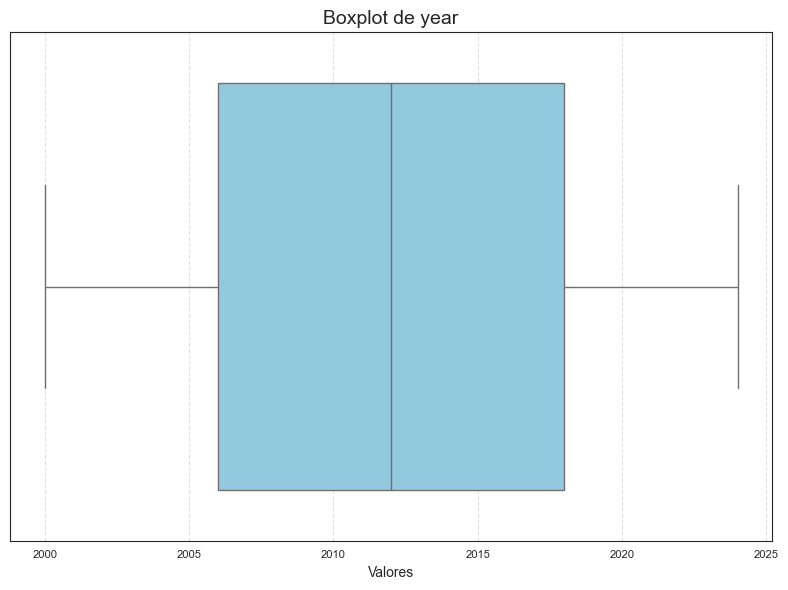

No se encontraron outliers en year
------------------------------


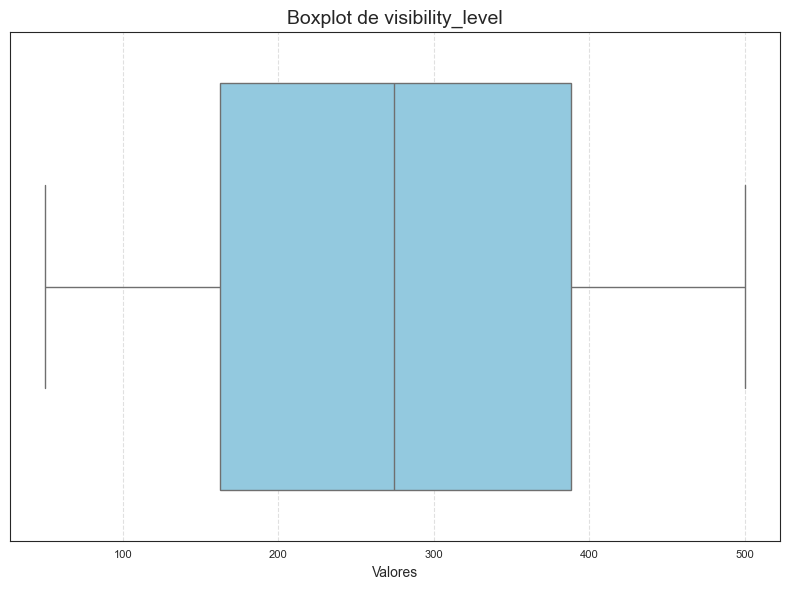

No se encontraron outliers en visibility_level
------------------------------


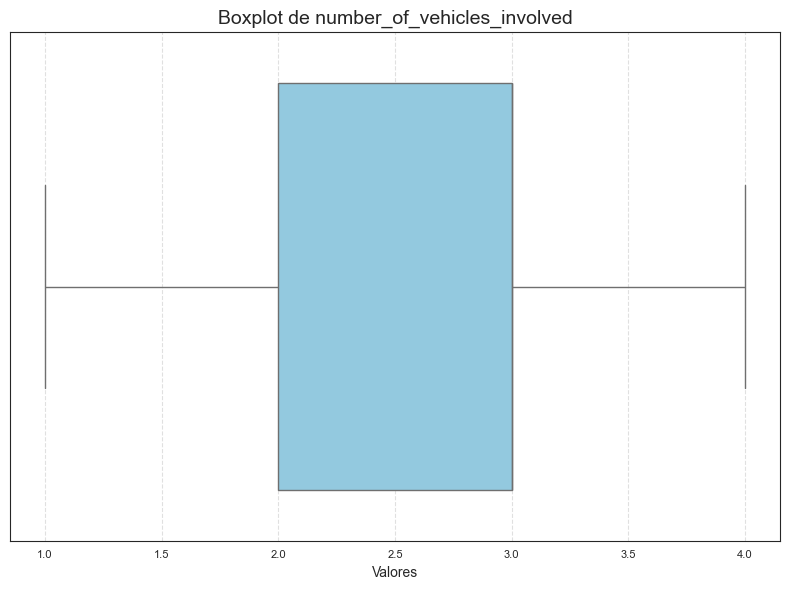

No se encontraron outliers en number_of_vehicles_involved
------------------------------


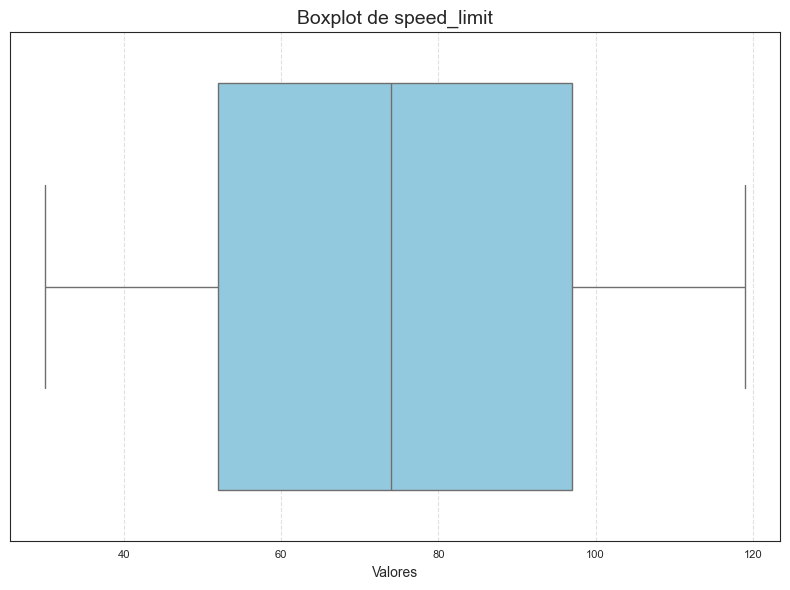

No se encontraron outliers en speed_limit
------------------------------


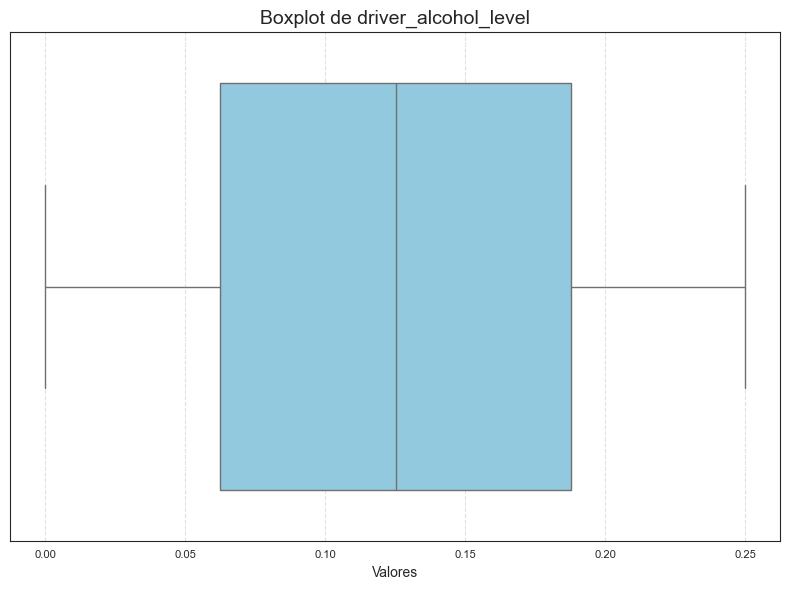

No se encontraron outliers en driver_alcohol_level
------------------------------


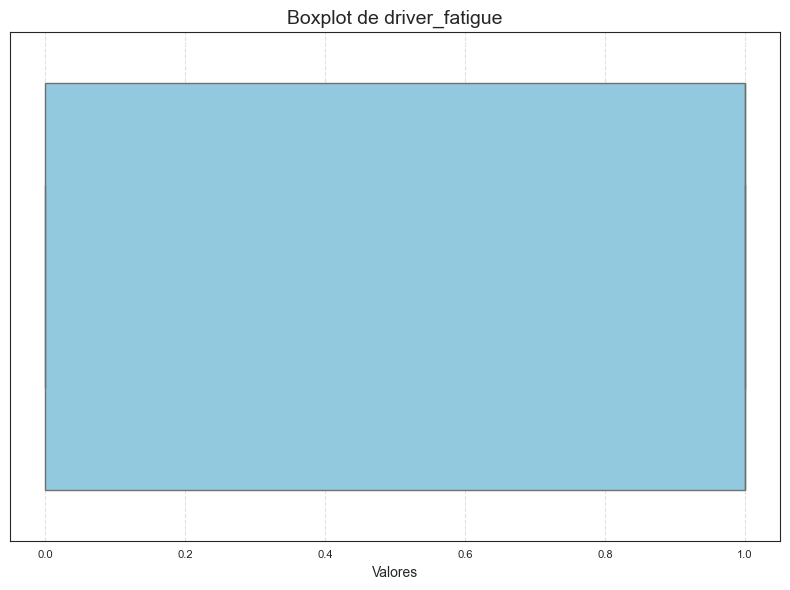

No se encontraron outliers en driver_fatigue
------------------------------


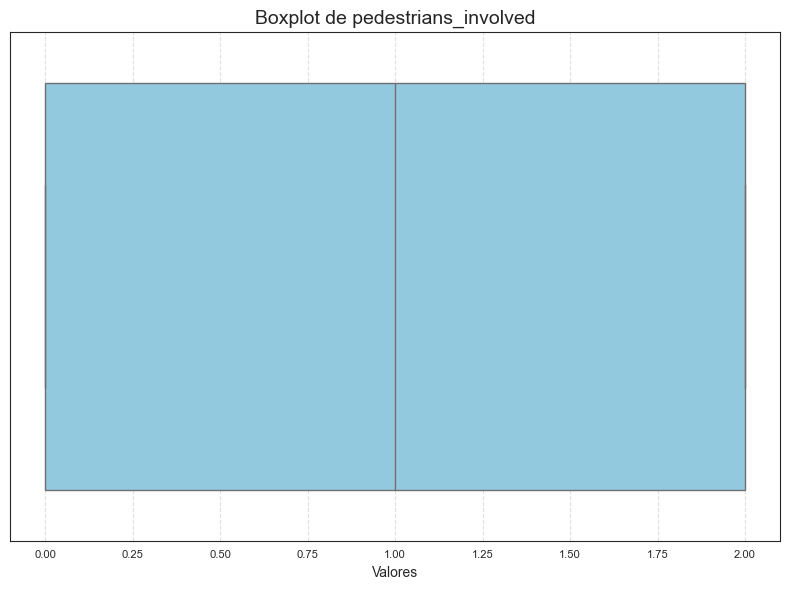

No se encontraron outliers en pedestrians_involved
------------------------------


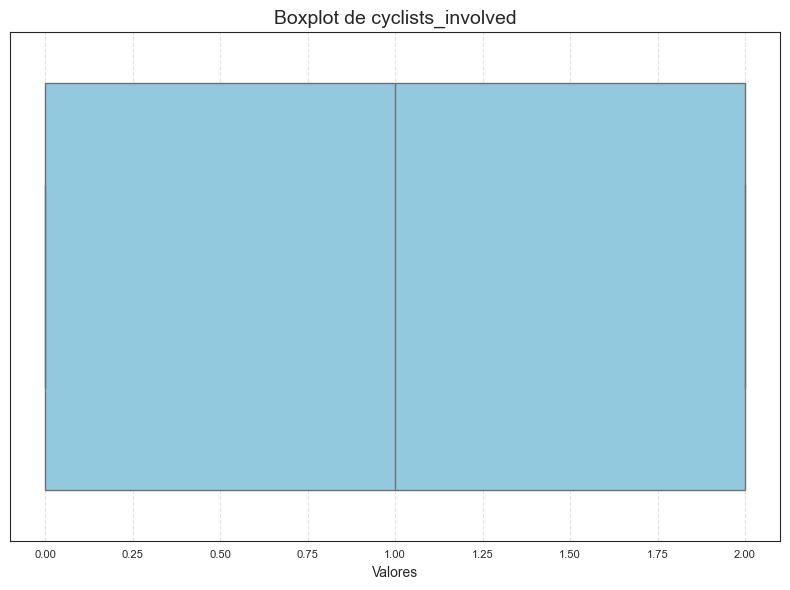

No se encontraron outliers en cyclists_involved
------------------------------


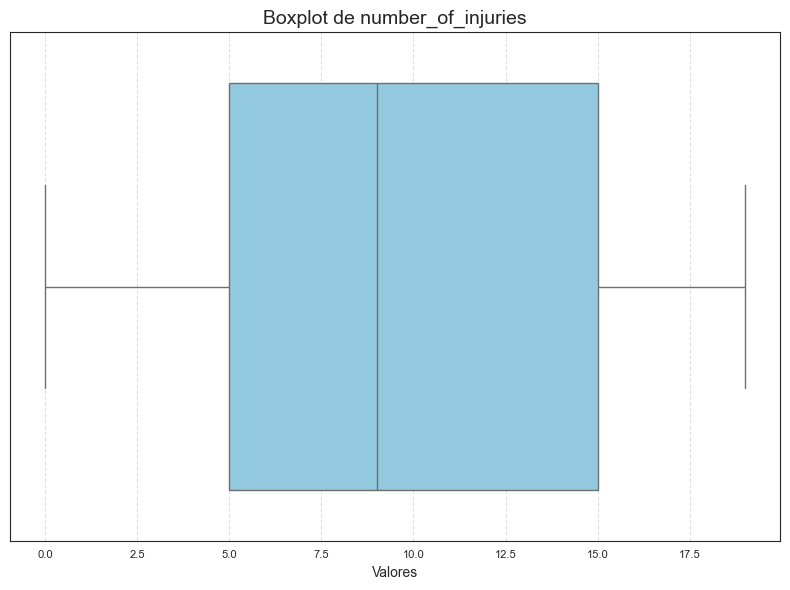

No se encontraron outliers en number_of_injuries
------------------------------


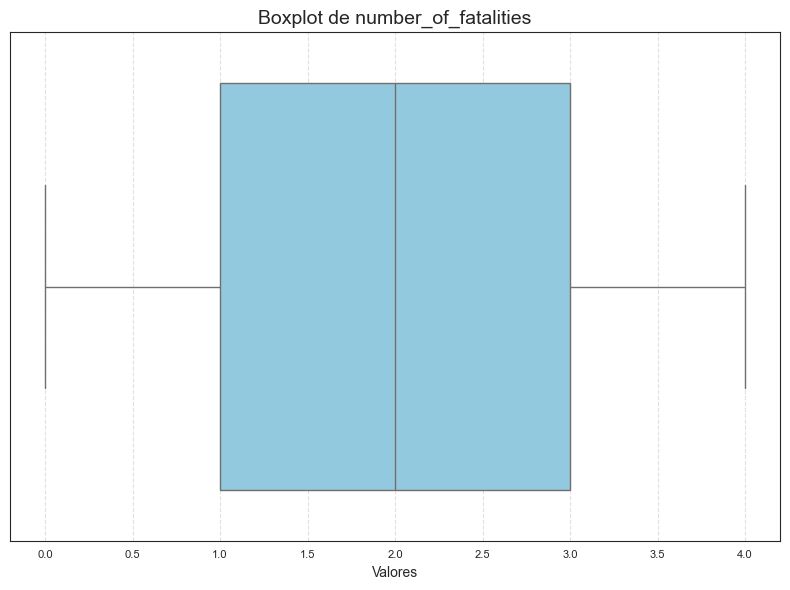

No se encontraron outliers en number_of_fatalities
------------------------------


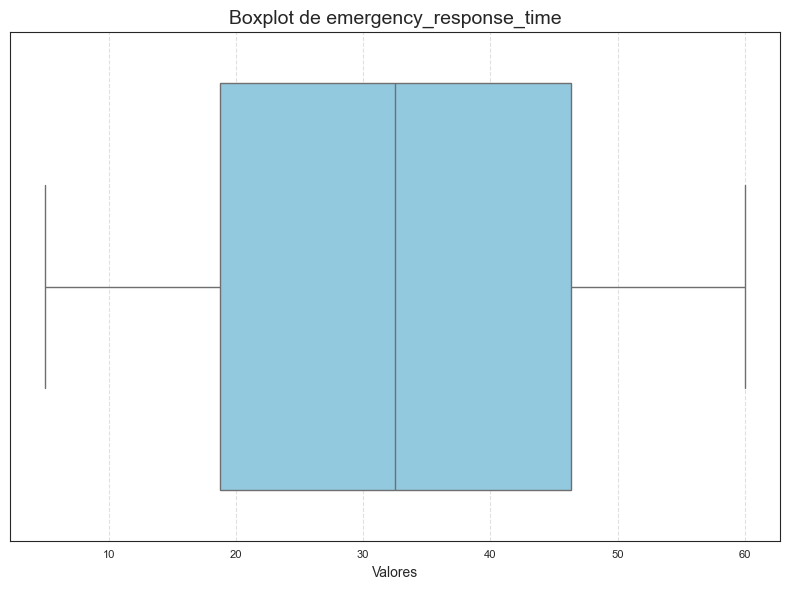

No se encontraron outliers en emergency_response_time
------------------------------


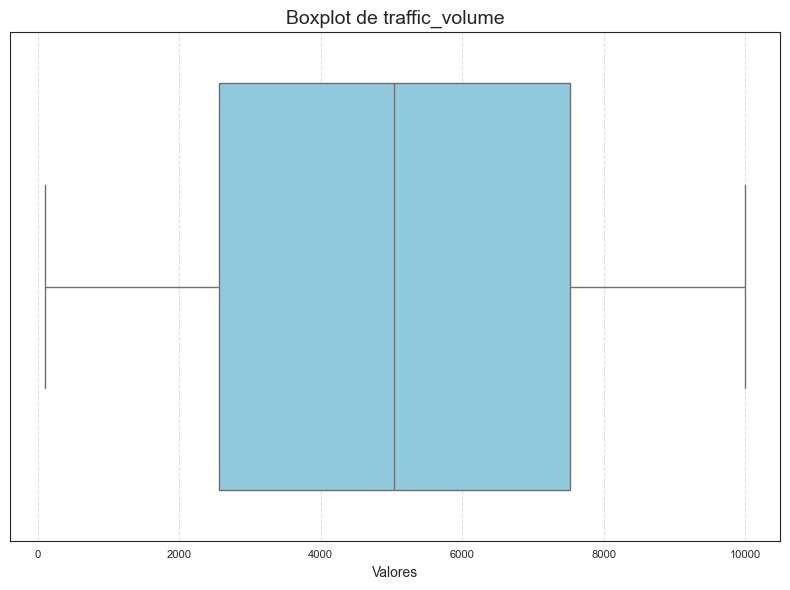

No se encontraron outliers en traffic_volume
------------------------------


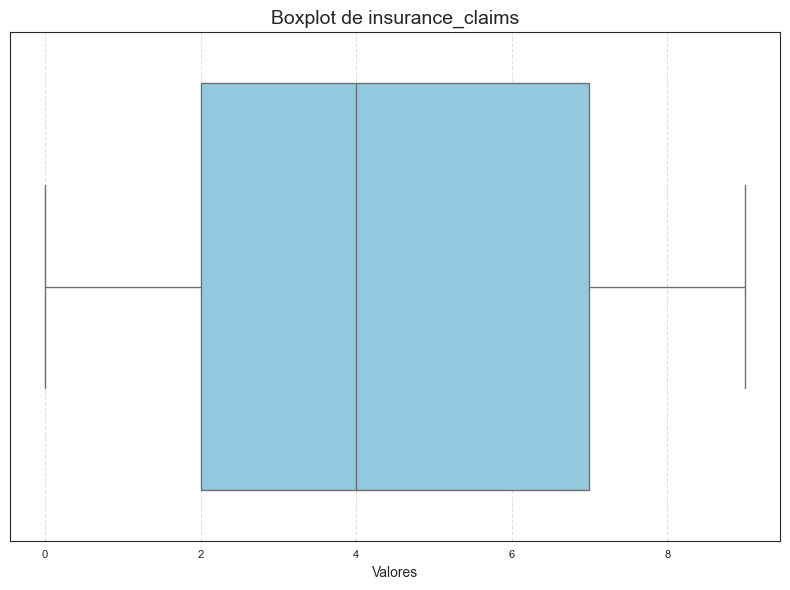

No se encontraron outliers en insurance_claims
------------------------------


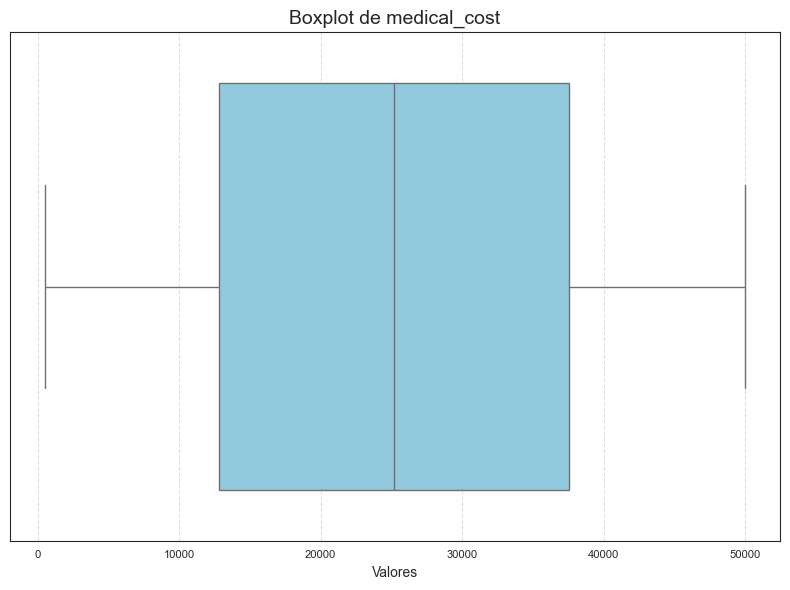

No se encontraron outliers en medical_cost
------------------------------


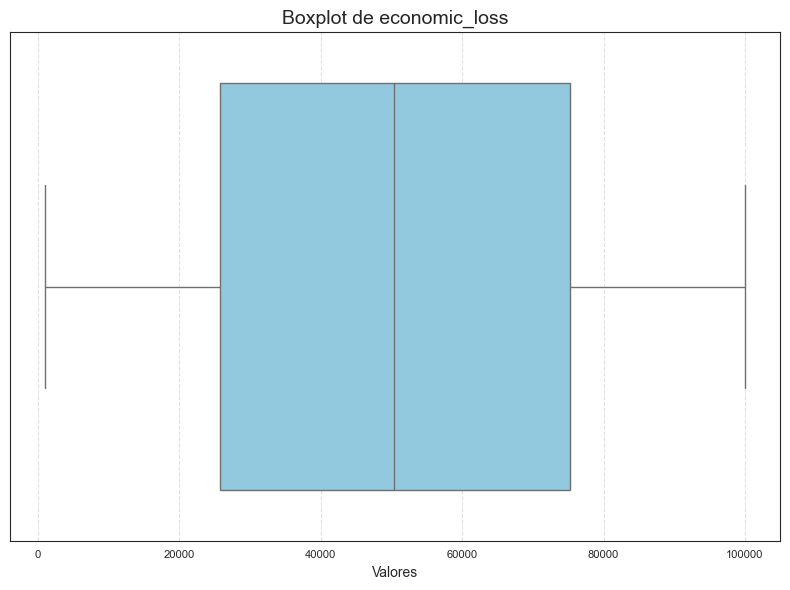

No se encontraron outliers en economic_loss
------------------------------


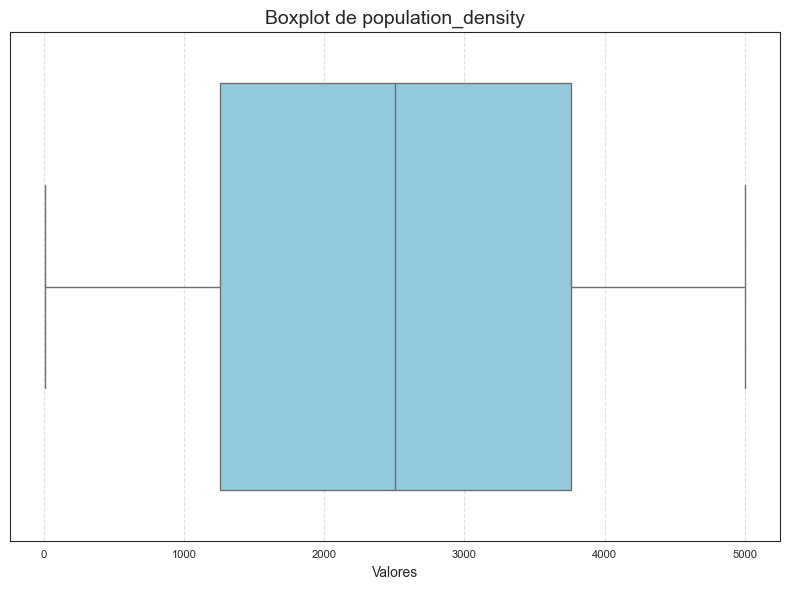

No se encontraron outliers en population_density
------------------------------


In [46]:
numeric_cols = df.select_dtypes(include=['number']).columns
if 'id' in numeric_cols:
    numeric_cols = numeric_cols.drop('id')

for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col], color='skyblue')  
    plt.title(f'Boxplot de {col}', fontsize=14)
    plt.xlabel('Valores', fontsize=10)
    plt.grid(True, axis='x', linestyle='--', alpha=0.6)
    plt.xticks(fontsize=8)
    plt.tight_layout()
    plt.show()

    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    if not outliers.empty:
        print(f"Outliers en {col}:")
        print(outliers[[col]])
        print(f"Número de outliers: {len(outliers)}")
        print("-" * 30)
    else:
        print(f"No se encontraron outliers en {col}")
        print("-" * 30)

Este código recorre las columnas numéricas de un DataFrame, excluyendo la columna 'id', asociado a cada registro y que no es información original del dataset, y genera un boxplot individual para cada columna. Luego, calcula los límites para detectar valores atípicos (outliers) usando el método del rango intercuartílico (IQR) y los imprime en la consola, junto con el número total de outliers encontrados en cada columna.

En el gráfico no se encontraron outliers, por lo que en el dataset no hay datos atípicos, como habíamos mencionado anteriormente. 

#### Grafico de la Matriz de Correlacion entre Variables Numéricas 

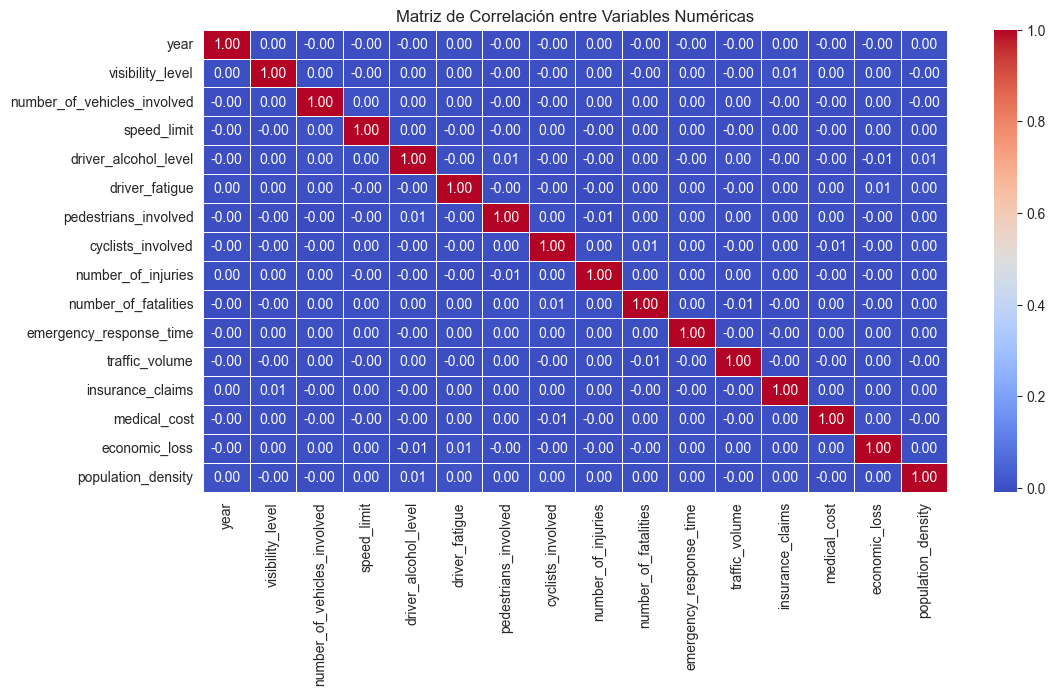

In [47]:
numeric_df = df.select_dtypes(include=['number'])

corr_matrix = numeric_df.corr()

plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

plt.title("Matriz de Correlación entre Variables Numéricas")
plt.show()

Esta representación nos permite evaluar la relación lineal entre distintas características de los incidentes, facilitando la identificación de patrones y dependencias entre factores clave en la siniestralidad vial. 

La matriz indica valores de correlación cercanos a 0 en casi todas las combinaciones de variables, lo que sugiere una independencia estadística entre ellas. Se identifican valores de correlación alta (cercanos a 1) en algunas variables relacionadas. 

La matriz de correlación evidencia una baja relación lineal entre las variables estudiadas, lo que refuerza la idea de que los accidentes de tráfico son fenómenos complejos, influenciados por múltiples factores simultáneamente.